In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
pip install nitk

In [3]:
#  Importing important libraries
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings

In [4]:
#  Importing dataset
dataset=pd.read_csv('/content/drive/MyDrive/Data Science Project/My Resume Project/Twitter Sentiment Project/train.csv')
testdata=pd.read_csv('/content/drive/MyDrive/Data Science Project/My Resume Project/Twitter Sentiment Project/test.csv')

In [5]:
dataset.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [7]:
dataset['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [8]:
# Combine train and test set
combi=dataset.append(testdata,ignore_index=True)
combi

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation
...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."


In [9]:
combi.shape

(49159, 3)

In [10]:
# Importing regular expression library 
# Cleaning tweet text by removin links, special characters etc
def remove_pattern(input_txt,pattern):
  r=re.findall(pattern,input_txt)
  for i in r:
    input_txt=re.sub(i,'',input_txt)

  return input_txt

In [11]:
#  Remove twitter handles
combi['tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")
combi

,id,label,tweet
0,1,0.0,when a father is dysfunctional and is so sel...
1,2,0.0,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation
...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."


In [12]:
#  Removing special characters, numbers, punctuations
combi['tweet']=combi['tweet'].str.replace("[^a-zA-Z#]"," ")
combi

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,id,label,tweet
0,1,0.0,when a father is dysfunctional and is so sel...
1,2,0.0,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide society now #motivation
...,...,...,...
49154,49155,NaN,thought factory left right polarisation #tru...
49155,49156,NaN,feeling like a mermaid #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio omg am...
49157,49158,NaN,happy at work conference right mindset leads...


In [13]:
#  Removing short words
combi['tweet']=combi['tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi

,id,label,tweet
0,1,0.0,when father dysfunctional selfish drags kids i...
1,2,0.0,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty
3,4,0.0,#model love take with time
4,5,0.0,factsguide society #motivation
...,...,...,...
49154,49155,NaN,thought factory left right polarisation #trump...
49155,49156,NaN,feeling like mermaid #hairflip #neverready #fo...
49156,49157,NaN,#hillary #campaigned today #ohio used words li...
49157,49158,NaN,happy work conference right mindset leads cult...


In [14]:
#  Tokenization is the act of breaking up a sequence of strings into pieces such as words, keywords, phrases, symbols and other elements called tokens. 
tokenized_tweet=combi['tweet'].apply(lambda x:x.split())
tokenized_tweet

0        [when, father, dysfunctional, selfish, drags, ...
1        [thanks, #lyft, credit, cause, they, offer, wh...
2                                  [bihday, your, majesty]
3                         [#model, love, take, with, time]
4                       [factsguide, society, #motivation]
                               ...                        
49154    [thought, factory, left, right, polarisation, ...
49155    [feeling, like, mermaid, #hairflip, #neverread...
49156    [#hillary, #campaigned, today, #ohio, used, wo...
49157    [happy, work, conference, right, mindset, lead...
49158    [song, glad, free, download, #shoegaze, #newmu...
Name: tweet, Length: 49159, dtype: object

In [15]:
# Stemming is a rule-based process of stripping the suffixes ("ing","es","ly","s" etc)  from a word.
from nltk.stem.porter import *
stemmer=PorterStemmer()
tokenized_tweet=tokenized_tweet.apply(lambda x : [stemmer.stem(i) for i in x])
tokenized_tweet

0        [when, father, dysfunct, selfish, drag, kid, i...
1        [thank, #lyft, credit, caus, they, offer, whee...
2                                  [bihday, your, majesti]
3                         [#model, love, take, with, time]
4                             [factsguid, societi, #motiv]
                               ...                        
49154    [thought, factori, left, right, polaris, #trum...
49155    [feel, like, mermaid, #hairflip, #neverreadi, ...
49156    [#hillari, #campaign, today, #ohio, use, word,...
49157    [happi, work, confer, right, mindset, lead, cu...
49158    [song, glad, free, download, #shoegaz, #newmus...
Name: tweet, Length: 49159, dtype: object

In [16]:
#  Now let's stitch these tokens
for i in range(len(tokenized_tweet)):
  tokenized_tweet[i]=' '.join(tokenized_tweet[i])

combi['tweet']=tokenized_tweet
combi

,id,label,tweet
0,1,0.0,when father dysfunct selfish drag kid into dys...
1,2,0.0,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesti
3,4,0.0,#model love take with time
4,5,0.0,factsguid societi #motiv
...,...,...,...
49154,49155,NaN,thought factori left right polaris #trump #use...
49155,49156,NaN,feel like mermaid #hairflip #neverreadi #forma...
49156,49157,NaN,#hillari #campaign today #ohio use word like a...
49157,49158,NaN,happi work confer right mindset lead cultur de...


In [17]:
!pip install wordcloud

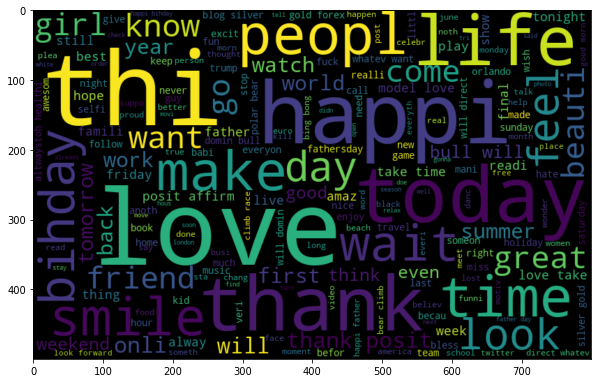

In [18]:
##Story Generation and Visualization from Tweets
#A wordcloud is a visualization wherein the most frequent words appear in 
#large size and the less frequent words appear in smaller sizes.
all_words = ' '.join([text for text in combi['tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=150).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")

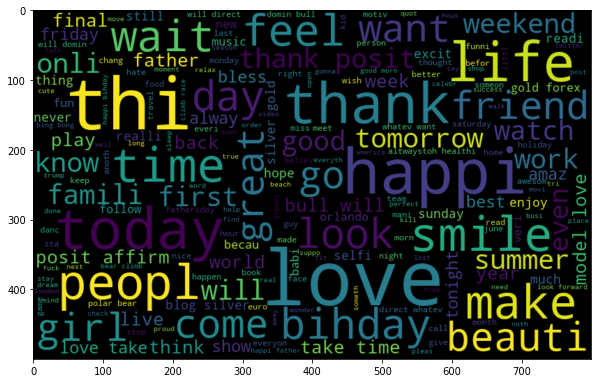

In [19]:
#Words in non racist/sexist tweets
normal_words=' '.join([text for text in combi['tweet'][combi['label']==0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")

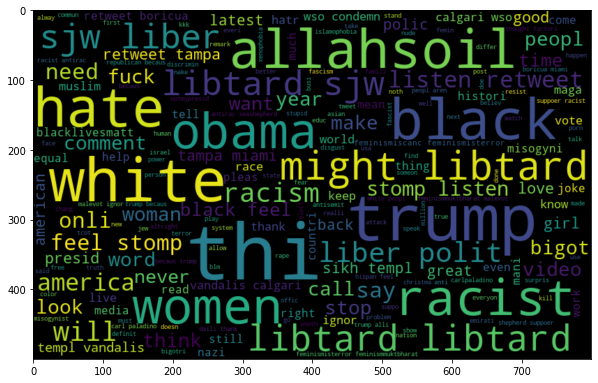

In [20]:
#Racist/Sexist Tweets
negative_words = ' '.join([text for text in combi['tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")

In [21]:
#Understanding the impact of Hashtags on tweets sentiment
#Hashtags in twitter are synonymous with the ongoing trends on twitter at any particular point in time.
# function to collect hashtag
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [22]:
# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(combi['tweet'][combi['label'] == 0])
HT_regular

[['run'],
 ['lyft', 'disapoint', 'getthank'],
 [],
 ['model'],
 ['motiv'],
 ['allshowandnogo'],
 [],
 ['school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl'],
 ['allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'],
 [],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshoot',
  'orlandoshoot',
  'biggerproblem',
  'selfish',
  'heabreak',
  'valu',
  'love'],
 ['gettingf'],
 ['got', 'junior', 'yugyoem', 'omg'],
 ['thank', 'posit'],
 ['friday', 'cooki'],
 [],
 ['euro'],
 ['badday', 'coneofsham', 'cat', 'piss', 'funni', 'laugh'],
 ['wine', 'weekend'],
 ['tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssa', 'love'],
 ['smile', 'media', 'pressconfer', 'antalya', 'turkey', 'throwback'],
 ['ica'],
 [],
 ['rip', 'orlando'],
 [],
 ['alohafriday', 'time', 'not', 'exist', 'positivevib', 'hawaiian'],
 [],
 ['goodnight', 'badmonday'],
 ['taylorswift'],
 ['travelingram', 'dalat', 'ripinkyli

In [23]:
# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tweet'][combi['label'] == 1])
HT_negative

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia'],
 ['love', 'peac'],
 [],
 ['race', 'ident', 'med'],
 ['altright', 'whitesupremaci'],
 ['linguist', 'race', 'power', 'raciolinguist'],
 ['brexit'],
 ['peopl', 'trump', 'republican'],
 ['michelleobama'],
 ['knick', 'golf'],
 ['jewishsupremacist'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['trash', 'hate'],
 [],
 [],
 ['stereotyp', 'prejudic', 'hope', 'hate', 'conflict'],
 ['pol', 'bluelivesmatt', 'draintheswamp', 'ferguson'],
 [],
 ['antisemit', 'hocoschool', 'columbiamd', 'hocomd'],
 ['nazi', 'hatr', 'bigotri'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['fyi', 'tcot'],
 ['topoli'],
 ['blacklivesmatt'],
 ['ushistori', 'eugen'],
 ['biher', 'bigotri', 'altright', 'potu', 'theresist'],
 ['crime', 'offic'],
 [],
 ['black', 'retweet', 'tampa', 'miami'],
 ['allahsoil'],
 [],
 ['prais', 'cleveland', 'rnc', 'white', 'tamirric',

In [24]:
# unnesting list
HT_regular = sum(HT_regular,[])
HT_regular

['run',
 'lyft',
 'disapoint',
 'getthank',
 'model',
 'motiv',
 'allshowandnogo',
 'school',
 'exam',
 'hate',
 'imagin',
 'actorslif',
 'revolutionschool',
 'girl',
 'allin',
 'cav',
 'champion',
 'cleveland',
 'clevelandcavali',
 'ireland',
 'blog',
 'silver',
 'gold',
 'forex',
 'orlando',
 'standwithorlando',
 'pulseshoot',
 'orlandoshoot',
 'biggerproblem',
 'selfish',
 'heabreak',
 'valu',
 'love',
 'gettingf',
 'got',
 'junior',
 'yugyoem',
 'omg',
 'thank',
 'posit',
 'friday',
 'cooki',
 'euro',
 'badday',
 'coneofsham',
 'cat',
 'piss',
 'funni',
 'laugh',
 'wine',
 'weekend',
 'tgif',
 'gamedev',
 'indiedev',
 'indiegamedev',
 'squad',
 'upsideofflorida',
 'shopalyssa',
 'love',
 'smile',
 'media',
 'pressconfer',
 'antalya',
 'turkey',
 'throwback',
 'ica',
 'rip',
 'orlando',
 'alohafriday',
 'time',
 'not',
 'exist',
 'positivevib',
 'hawaiian',
 'goodnight',
 'badmonday',
 'taylorswift',
 'travelingram',
 'dalat',
 'ripinkylif',
 'photoshop',
 'enoughisenough',
 'dontph

In [25]:
HT_negative = sum(HT_negative,[])
HT_negative

['cnn',
 'michigan',
 'tcot',
 'australia',
 'opkillingbay',
 'seashepherd',
 'helpcovedolphin',
 'thecov',
 'helpcovedolphin',
 'neverump',
 'xenophobia',
 'love',
 'peac',
 'race',
 'ident',
 'med',
 'altright',
 'whitesupremaci',
 'linguist',
 'race',
 'power',
 'raciolinguist',
 'brexit',
 'peopl',
 'trump',
 'republican',
 'michelleobama',
 'knick',
 'golf',
 'jewishsupremacist',
 'libtard',
 'sjw',
 'liber',
 'polit',
 'trash',
 'hate',
 'stereotyp',
 'prejudic',
 'hope',
 'hate',
 'conflict',
 'pol',
 'bluelivesmatt',
 'draintheswamp',
 'ferguson',
 'antisemit',
 'hocoschool',
 'columbiamd',
 'hocomd',
 'nazi',
 'hatr',
 'bigotri',
 'libtard',
 'sjw',
 'liber',
 'polit',
 'fyi',
 'tcot',
 'topoli',
 'blacklivesmatt',
 'ushistori',
 'eugen',
 'biher',
 'bigotri',
 'altright',
 'potu',
 'theresist',
 'crime',
 'offic',
 'black',
 'retweet',
 'tampa',
 'miami',
 'allahsoil',
 'prais',
 'cleveland',
 'rnc',
 'white',
 'tamirric',
 'rip',
 'bigot',
 'blacklivesmatt',
 'feminismiscanc

In [26]:
#Non-Racist/Sexist Tweets

a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
d

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375
...,...,...
19490,kamp,1
19491,ucsd,1
19492,berlincitygirl,1
19493,genf,1


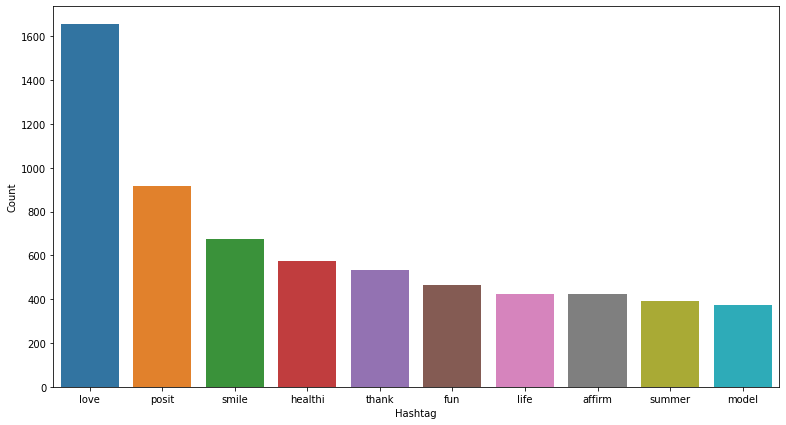

In [27]:
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(13,7))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")


In [28]:
#Racist/Sexist Tweets

b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

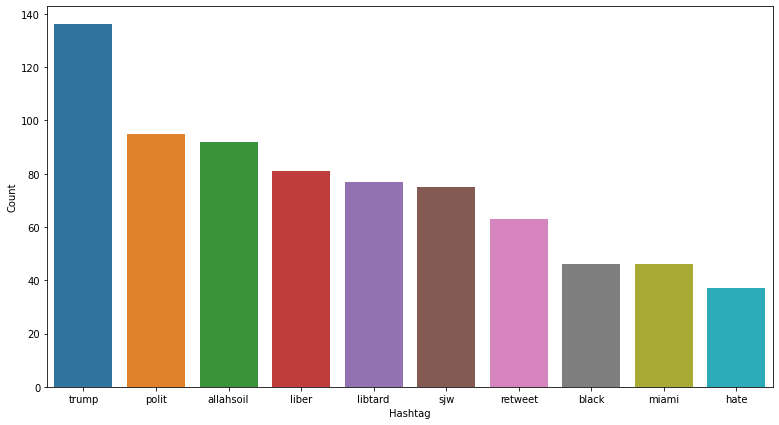

In [29]:
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(13,7))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

As expected, most of the terms are negative with a few neutral terms as well.
So,it’s not a bad idea to keep these hashtags in our data as they contain useful information.

-------------------------------------------------------------------------------------------------


Extracting Features from Cleaned Tweets

Bag-of-Words Features
Bag-of-Words features can be easily created using sklearn’s CountVectorizer function. 
We will set the parameter max_features = 1000 to select only top 1000 terms ordered by term frequency across the corpus.

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combi['tweet'])
bow

<49159x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 191502 stored elements in Compressed Sparse Row format>

In [32]:
#TF-IDF Features
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combi['tweet'])
tfidf

<49159x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 191502 stored elements in Compressed Sparse Row format>

In [33]:
#Building log model using Bag-of-Words features
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [34]:
train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

In [35]:
train_bow

<31962x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 124625 stored elements in Compressed Sparse Row format>

In [36]:
test_bow

<17197x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 66877 stored elements in Compressed Sparse Row format>

In [38]:
# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, dataset['label'], random_state=42, test_size=0.3)
lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

LogisticRegression()

In [45]:
prediction1 = lreg.predict_proba(xvalid_bow) # predicting on the validation set

prediction_int1 = prediction1[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int1 = prediction_int1.astype(np.int)


In [46]:

f1_score(yvalid, prediction_int1) # calculating f1 score

0.5303408146300915

In [47]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yvalid, prediction_int1)
cm


array([[8705,  200],
       [ 365,  319]])

In [48]:
prediction_test = lreg.predict_proba(test_bow) # predicting on the testset
prediction_test = prediction_test[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_test = prediction_test.astype(np.int)

In [49]:
#Export submission file

testdata['label'] = prediction_test
submission = testdata[['id','label']]
submission.to_csv('sub_log_bow.csv', index=False) # writing data to a CSV file

In [50]:
#Building log model using TF-IDF features
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]


In [51]:
xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

In [52]:
lreg.fit(xtrain_tfidf, ytrain)

prediction2 = lreg.predict_proba(xvalid_tfidf)
prediction_int2 = prediction2[:,1] >= 0.3
prediction_int2 = prediction_int2.astype(np.int)

In [53]:

f1_score(yvalid, prediction_int2)

0.5451327433628319

In [54]:
prediction_test = lreg.predict_proba(test_bow) # predicting on the testset
prediction_test = prediction_test[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_test = prediction_test.astype(np.int)


In [55]:
#Export submission file

testdata['label'] = prediction_test
submission = testdata[['id','label']]
submission.to_csv('sub_log_tfidf.csv', index=False) # writing data to a CSV file
